# Data Mining - Project One, Twitter Sentiment Analysis

## Zoe Markovits

### Data Source: Twitter US Airline Sentiment Kaggle Dataset
   * A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 
    2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by 
    categorizing negative reasons (such as "late flight" or "rude service").
    
### Why This Question:
   * Given the growing presence of companies using Twitter as a customer service platform, and as a way to communicate 
   directly with their clientele, this problem is relevant so that these companies can see how people are talking 
   about their experiences and so that they can better their business practices.    
   
### Questions to be Answered:
   * Can we plot this dataset to see how sentiment and airline interact?
   * Can we run our own sentiment analysis function to see if it matches the already labeled sentiment feature?
   * If we run a clustering algorithm, will a natural pattern appear that corresponds to our three sentiment values?
   
### Models and Methods Used:
   * Data Cleaning: python and pandas
   * Plotting Features: matplotlib and seaborn
   * Text Cleaning and Sentiment Analysis: NLTK and TextBlob
   * Clustering: TF-IDF Vectorizer, KMeans, SVD, TSNE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl 
pd.set_option('display.max_columns', 50)
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project One/twitter-airline-sentiment/Tweets.csv')
print df.shape
df.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Original dataset given by Kaggle, has 14,640 rows and 15 columns. Each row is a different tweet and contains features such as the text of the tweet, the coordinates, the time it was created, the location, the timezone, the number of retweets and then things like the airline, the sentiment of the tweet, and the reason for a negative sentiment.

#### Cleaning Process: 

* Dropping irrelevant features: Tweet ID, Airline Confidence, Negative Reason Confidence, Airline Sentiment Gold, Name, Negative Reason Gold, Tweet Coordinates, Tweet Location
* Filling null values: For the Negative_Reason column, fill NaN values with a 0 
* Creating dummy variables: Sentiment, Negative Reason, and Airline are all categorical variables that need to be one hot encoded
* Cleaning column names: Cleaning structure so that they're all capitalized and if they contain multiple words have an underscore between them

Below is the new dataframe after cleaning.

In [3]:
df2 = pd.read_pickle('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project One/df.pkl')
df2.head()

,Sentiment,Negative_Reason,Airline,Text,Retweet_Count,Time_Created,User_Timezone,Negative,Neutral,Positive,Bad_Flight,Can't_Tell,Cancelled_Flight,Customer_Service_Issue,Damaged_Luggage,Flight_Attendant_Complaints,Flight_Booking_Problems,Late_Flight,Lost_Luggage,longlines,American,Delta,Southwest,US_Airways,United,Virgin_America
0,neutral,0,Virgin America,@VirginAmerica What @dhepburn said.,0,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,positive,0,Virgin America,@VirginAmerica plus you've added commercials t...,0,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada),0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,neutral,0,Virgin America,@VirginAmerica I didn't today... Must mean I n...,0,2015-02-24 11:15:48 -0800,Central Time (US & Canada),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,0,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada),1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,0,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada),1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Plotting Features

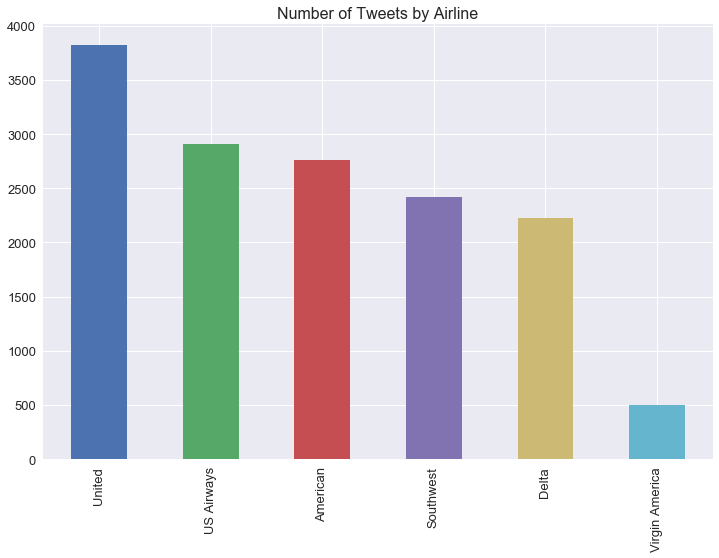

In [4]:
airline_counts = df2['Airline'].value_counts()
airline_counts.plot(kind = 'bar', figsize=(12,8), fontsize=13)
plt.title('Number of Tweets by Airline', fontsize=16)

The above plot shows the number of tweets by airline, we can see that United is the airline with the highest number of tweets.

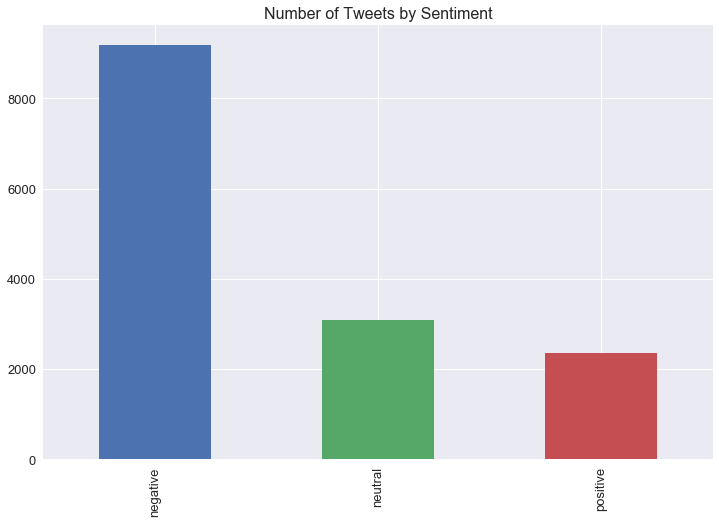

In [5]:
sentiment_counts = df2['Sentiment'].value_counts()
sentiment_counts.plot(kind = 'bar', figsize=(12,8), fontsize=13)
plt.title('Number of Tweets by Sentiment', fontsize=16)

The above plot shows the number of tweets by sentiment, we can see that there are significantly more negative tweets than positive or neutral tweets.

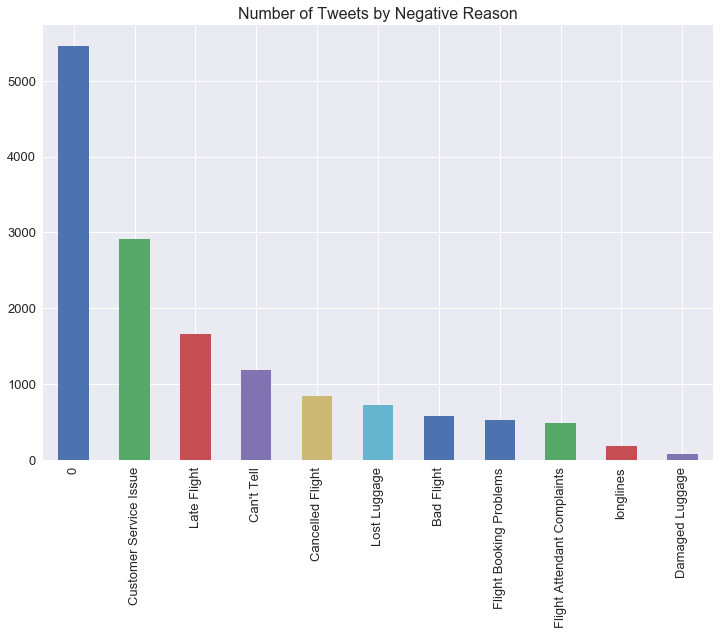

In [6]:
negative_reason_counts = df2['Negative_Reason'].value_counts()
negative_reason_counts.plot(kind = 'bar', figsize=(12,8), fontsize=13)
plt.title('Number of Tweets by Negative Reason', fontsize=16)

The above plot shows the number of tweets by negative reason, we can see that customer service issues and late flights were the top reasons for a negative sentiment.

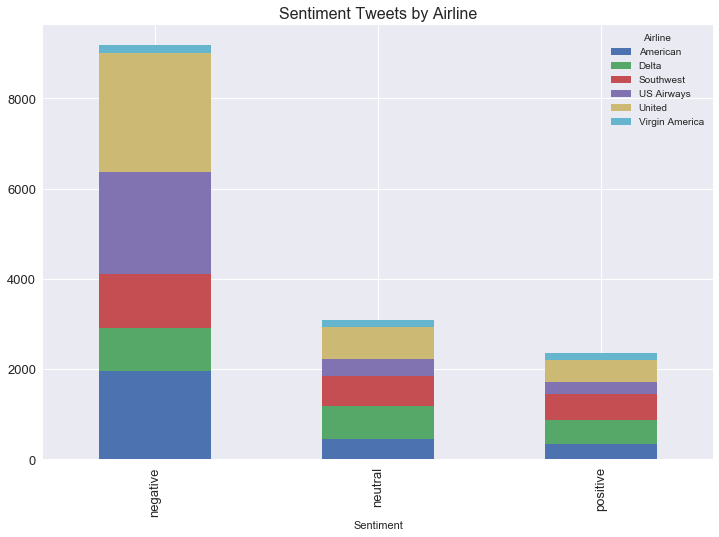

In [7]:
sentiment_airline = df2.groupby(['Sentiment','Airline'])['Sentiment'].count().unstack('Airline').fillna(0)
sentiment_airline.plot(kind = 'bar', figsize=(12,8), fontsize=13, stacked=True)
plt.title('Sentiment Tweets by Airline', fontsize=16)

This plot show the interaction of sentiment and airline. Here we can see again that there are significantly more negative tweets than neutral or positive tweets but we can also see that among the negative tweets the airlines with the most tweets are United and US Airways and among the postive tweets Southwest and Delta have the most tweets.

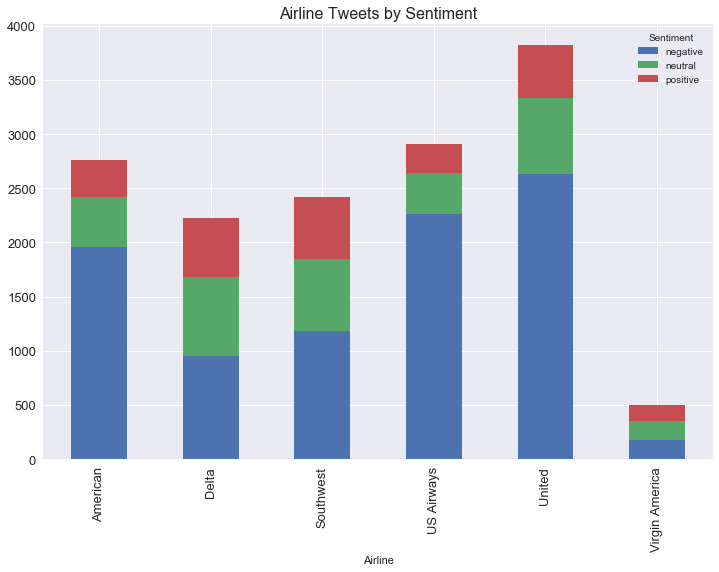

In [8]:
sentiment_airline = df2.groupby(['Airline','Sentiment'])['Airline'].count().unstack('Sentiment').fillna(0)
sentiment_airline.plot(kind = 'bar', figsize=(12,8), fontsize=13, stacked=True)
plt.title('Airline Tweets by Sentiment', fontsize=16)

When we break it down by airline instead of sentiment we can very clearly see that United has the most negative tweets. Its also interesting that Virgin America is the only airline that has an equal ratio of negative, positive, and neutral tweets.

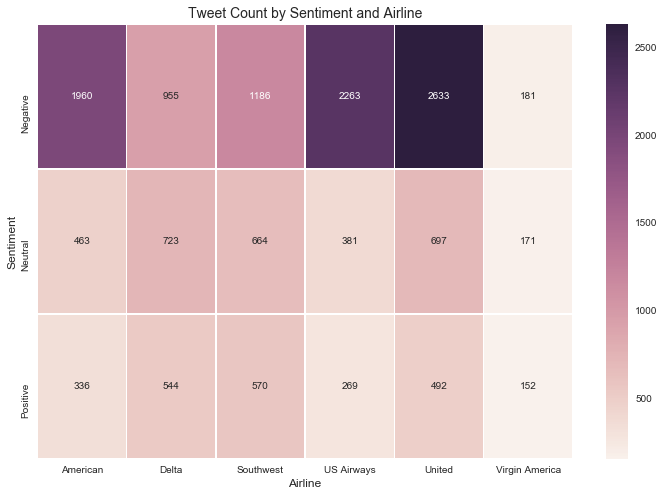

In [9]:
df_report = pd.read_pickle('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project One/df2.pkl')
f, ax = plt.subplots(figsize=(12, 8))
yticks = ['Negative','Neutral','Positive']
sns.heatmap(df_report[['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']], annot=True, \
            fmt="d", linewidths=.5, ax=ax, yticklabels=yticks)
plt.title('Tweet Count by Sentiment and Airline', fontsize=14)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)

Another way of plotting the interaction between sentiment and airline except with a heatmap. We can see again the significantly higher number of negative tweets and the even ratio of Virgin America but we also see here that Delta has close to an even ratio as well.

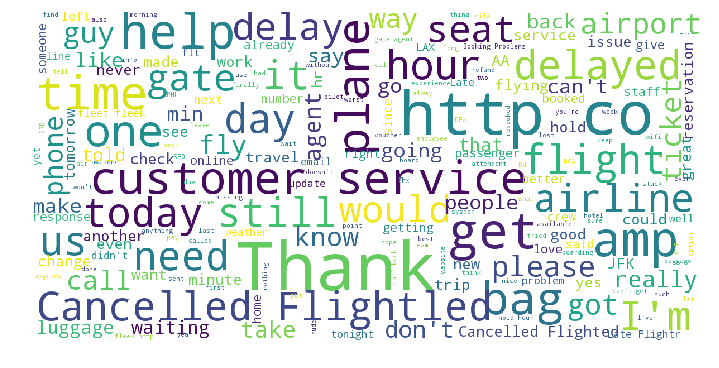

In [10]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
airline_names = ['American','Delta','Southwest','US Airways','United','VirginAmerica','Virgin America','AmericanAir',\
                 'SouthwestAir','USAirway','USAirways','JetBlue','flight']
stoplist = stopwords.words('english') + airline_names
wordcloud = WordCloud(
        background_color='white',
        stopwords=stoplist,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(' '.join(df2['Text']))
ax = plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the word cloud above we can see that some of the most used words are customer service, cancelled flight, thank you, and delayed. 

#### Natural Language Processing: Cleaning and Sentiment Analysis

* To focus on just the actual tweets, create a new dataframe that just has the features Sentiment, Airline, and Text. 
* In order to clean up the text and get it into working condition for Natural Langauge Processing, wrote two functions, one which gives us the Clean_Text feature and one the Cleaner_Text feature
* There is also a function that gets rid of the mentions of a tweet so drops all of the airline names. 
* The clean text function gets rid of symbols, removes stop words, and lemmatizes the text to reduce related words
* The cleaner text function does all of this but also makes all of the text lower case and gets rid of even more of the unnecessary text so that we can run a sentiment analysis function.

In [11]:
df_text = pd.read_pickle('/Users/zoemarkovits/Documents/Grad School/Spring 2019/Data Mining/Project One/df3.pkl')
df_text.head()

,Sentiment,Airline,Text,Clean_Text,Cleaner_Text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said.,"[dhepburn, said]"
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,plus you've added commercials experience... t...,"[added, commercial, experience, tacky]"
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,didn't today... Must mean need take another t...,"[today, must, mean, need, take, another, trip]"
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,"it's really aggressive blast obnoxious ""enter...","[really, aggressive, blast, obnoxious, enterta..."
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,it's really big bad thing,"[really, big, bad, thing]"


In [12]:
from textblob import TextBlob
def sentiment_analysis(x):
    string = ''.join(x)
    blob = TextBlob(string).sentiment
    return blob
df_text['Sentiment_Analysis'] = df_text['Cleaner_Text'].apply(sentiment_analysis)
df_text.head()

,Sentiment,Airline,Text,Clean_Text,Cleaner_Text,Sentiment_Analysis
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,What said.,"[dhepburn, said]","(0.0, 0.0)"
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,plus you've added commercials experience... t...,"[added, commercial, experience, tacky]","(0.0, 0.0)"
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,didn't today... Must mean need take another t...,"[today, must, mean, need, take, another, trip]","(0.0, 0.0)"
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,"it's really aggressive blast obnoxious ""enter...","[really, aggressive, blast, obnoxious, enterta...","(0.0, 0.0)"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,it's really big bad thing,"[really, big, bad, thing]","(0.0, 0.0)"


In [13]:
df_text.Sentiment_Analysis.value_counts()

(0.0, 0.0)                           14548
(0.2, 0.2)                              42
(0.35, 0.65)                             5
(0.0, 0.1)                               4
(-1.0, 1.0)                              4
(0.0, 1.0)                               4
(0.7, 0.6)                               2
(0.5, 0.6)                               2
(0.285714285714, 0.535714285714)         2
(0.1, 1.0)                               1
(0.433333333333, 0.833333333333)         1
(0.2, 0.9)                               1
(0.4, 0.4)                               1
(-0.6, 1.0)                              1
(0.1, 0.9)                               1
(-0.3125, 0.6875)                        1
(-0.714285714286, 0.857142857143)        1
(-0.7, 0.666666666667)                   1
(0.214285714286, 0.571428571429)         1
(0.5, 0.888888888889)                    1
(-0.3, 0.6)                              1
(0.1, 0.3)                               1
(0.7, 0.9)                               1
(0.6, 0.9) 

So using TextBlob's built in sentiment function we can create an additional Sentiment Analysis feature that takes in all of the Cleaner_Text and gives back the sentiment and polarity. Here we can see that a majority of the values have a neutral sentiment but that could be because our Cleaner_Text feature got rid of too much information so might have to tune our cleaner function.

#### Clustering

* Next wanted to see if we run a clustering algorithm, will a natural pattern appear that corresponds to our three sentiment values
* In order to do this need to first use TF-IDF Vectorizer. Converts a collection of text documents, in this case tweets, to a matrix of token counts which produces a sparse representation.
* From this sparse matrix we run K-Means clustering to produce our three clusters. 
* Because of the sparseness, in order to visualize these clusters we use SVD (Singular Value Decomposition) and TSNE (t-Distributed Stochastic Neighbor Embedding) to plot. The SVD reduces our dimensionality and the TSNE visualizes high-dimensional data by giving each datapoint a location in a two or three-dimensional map.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import scipy.sparse

vectorizer = TfidfVectorizer(stop_words="english")
vectorizer_model = vectorizer.fit_transform(df_text['Text'])
sparse_matrix = scipy.sparse.csc_matrix(vectorizer_model)

In [15]:
k_means = KMeans(n_clusters=3, random_state=1234, init='k-means++', max_iter=100, n_init=5, verbose=1)
k_means.fit(sparse_matrix)

Initialization complete
Iteration  0, inertia 27908.826
Iteration  1, inertia 14319.085
Iteration  2, inertia 14301.253
Iteration  3, inertia 14300.691
Iteration  4, inertia 14300.502
Iteration  5, inertia 14300.363
Iteration  6, inertia 14300.259
Iteration  7, inertia 14300.148
Iteration  8, inertia 14299.998
Iteration  9, inertia 14299.749
Iteration 10, inertia 14299.204
Iteration 11, inertia 14298.173
Iteration 12, inertia 14297.916
Iteration 13, inertia 14297.911
Converged at iteration 13: center shift 0.000000e+00 within tolerance 6.683595e-09
Initialization complete
Iteration  0, inertia 27970.691
Iteration  1, inertia 14343.931
Iteration  2, inertia 14315.860
Iteration  3, inertia 14308.773
Iteration  4, inertia 14305.742
Iteration  5, inertia 14303.363
Iteration  6, inertia 14302.195
Iteration  7, inertia 14302.176
Iteration  8, inertia 14302.175
Converged at iteration 8: center shift 0.000000e+00 within tolerance 6.683595e-09
Initialization complete
Iteration  0, inertia 28213

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14640 samples in 0.015s...
[t-SNE] Computed neighbors for 14640 samples in 0.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14640
[t-SNE] Computed conditional probabilities for sample 2000 / 14640
[t-SNE] Computed conditional probabilities for sample 3000 / 14640
[t-SNE] Computed conditional probabilities for sample 4000 / 14640
[t-SNE] Computed conditional probabilities for sample 5000 / 14640
[t-SNE] Computed conditional probabilities for sample 6000 / 14640
[t-SNE] Computed conditional probabilities for sample 7000 / 14640
[t-SNE] Computed conditional probabilities for sample 8000 / 14640
[t-SNE] Computed conditional probabilities for sample 9000 / 14640
[t-SNE] Computed conditional probabilities for sample 10000 / 14640
[t-SNE] Computed conditional probabilities for sample 11000 / 14640
[t-SNE] Computed conditional probabilities for sample 12000 / 14640
[t-SNE] Computed conditional probabilities for sa

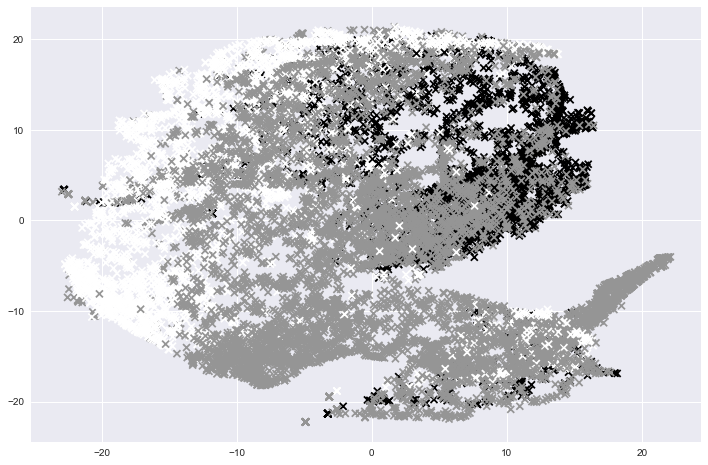

In [16]:
sparse_matrix_reduced = TruncatedSVD(n_components=3, random_state=1234).fit_transform(sparse_matrix)
sparse_matrix_embedded = TSNE(n_components=3, perplexity=40, verbose=2).fit_transform(sparse_matrix_reduced)

fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
plt.scatter(sparse_matrix_embedded[:, 0], sparse_matrix_embedded[:, 1], marker = "x", c = k_means.labels_)
plt.show()

The TSNE above does show three different clusters in black, grey, and white but there is a lot of overlap and they aren't necessarily distinct groups.

#### Future Work

Things I would do differently or work on in the future with more time:
* Focus more time on cleaning the text accurately in order to get rid of the right amount of stop words and redundancies without losing content.
* Take a further look at some of the features like location, and time created to see if that has any effect on content. For example maybe people who have very early flights or very late fligths are especially cranky and are more prone to angrily tweeting. Or if we focus on location maybe we can find which airports have more positive and more negative sentiments surrounding them.
* Figure out how they created their "confidence" columns and see if I can create a metric that compares to it in some way.

## Thank You!